<a href="https://colab.research.google.com/github/joaoleal02/Ambev_iHops/blob/master/N-Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import datetime
empdata = pd.read_csv(r'tabela_ambev_sql_finale.csv',index_col=False, delimiter=';')
empdata['Doc. Date'] = pd.to_datetime(empdata['Doc. Date'], format='%d/%m/%Y')
dados = empdata.loc[empdata['Postal Code'] == 83630]
#print(dados.head())
teste_tabela = empdata.loc[empdata['Subrand'] == 'BUD']
#teste_tabela =  empdata.loc[empdata['Unidade Container'] != 1]
#teste_tabela = teste_tabela.loc[teste_tabela['Unidade Container'] == 1]
#teste_tabela = teste_tabela.loc[teste_tabela['Subrand'] == 'CORONA EXTRA']
teste_tabela

,Doc. Date,Order qty,PCS delivered,HL delivered,MACO/HL,Postal Code,Sous groupement,Subrand,Container Type,Unidade Container,Container Size,Latitude,Longitude,TTC,Preço/L,Container Size 2
10,2021-01-11,70.0,70.0,4.2000,127.984305,83630.0,OLIVIER FRERES,BUD,PERFECT DRAFT,1.0,6.00,43.7330,6.1765,15.774775,2.629129,6.00
16,2021-01-11,40.0,40.0,2.4000,127.984305,85700.0,VINS REMY LIBOUREAU,BUD,PERFECT DRAFT,1.0,6.00,46.8354,-0.7778,15.774775,2.629129,6.00
51,2021-01-12,20.0,20.0,1.2000,127.984305,83130.0,DISTRIBUTION vins boissons (La Garde),BUD,PERFECT DRAFT,1.0,6.00,43.1228,6.0075,15.774775,2.629129,6.00
55,2021-01-12,1.0,72.0,5.7024,102.054025,35530.0,France BOISSONS,BUD,BOTTLE VP - Tendances,24.0,0.33,48.1211,-1.4597,24.491347,3.092342,7.92
63,2021-01-13,140.0,140.0,8.4000,127.984305,42150.0,ROUCHON SOUCHON,BUD,PERFECT DRAFT,1.0,6.00,45.4168,4.3120,16.272216,2.712036,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23243,2019-11-22,3.0,210.0,12.6000,127.984305,53200.0,VINOBEER,BUD,PERFECT DRAFT,1.0,6.00,47.7993,-0.7210,16.019280,2.669880,6.00
23251,2019-11-22,9.0,630.0,37.8000,127.984305,53200.0,VINOBEER,BUD,PERFECT DRAFT,1.0,6.00,47.7993,-0.7210,16.019280,2.669880,6.00
23259,2019-11-27,1.0,70.0,4.2000,127.984305,26300.0,MY BEERS,BUD,PERFECT DRAFT,1.0,6.00,44.9975,5.1859,16.609464,2.768244,6.00
23261,2019-11-27,4.0,280.0,16.8000,127.984305,53200.0,VINOBEER,BUD,PERFECT DRAFT,1.0,6.00,47.7993,-0.7210,16.019280,2.669880,6.00


In [28]:

#beer_user = dados.iloc[5]['Subrand']
quantidade_comprada = (dados.iloc[0]['HL delivered'])*100
taxa_recomendacao = 0.1
quantidade_recomendada = quantidade_comprada * taxa_recomendacao 
beer_user = 'BIRRA DEL BORGO'
# consertar LEFFE RITUEL NA TABELA EMPDATA
print(beer_user)

BIRRA DEL BORGO


In [29]:
from sklearn.cluster import KMeans
import numpy as np

#importando base de dados
df = pd.read_csv("MLiHops.csv")
df

,subrand,ibu,abv (%),corpo,aroma,tipo,Unnamed: 6
0,BIRRA DEL BORGO,20.0,5.0,1,0,600,AMERICAN PALE ALE
1,BUD,10.0,5.0,0,0,30,PALE LAGER
2,CAMDEN HELLS,29.0,4.6,0,0,30,PALE LAGER
3,CAMDEN PALE ALE,39.0,4.0,1,5,600,PALE ALE
4,CORONA EXTRA,18.0,4.6,0,0,30,PALE LAGER
5,GINETTE BLANCHE,12.0,5.0,0,0,615,WITBIER
6,GINETTE BLONDE,29.0,5.0,2,0,600,PALE ALE
7,GINETTE FRUIT,12.0,4.0,1,5,300,FRUIT BEER
8,GINETTE LAGER,25.0,4.5,0,0,30,PALE LAGER
9,GINETTE TRIPLE,15.0,9.0,1,10,660,TRIPEL


In [50]:
array1 = []

dicRecomendacao = {

  "Harmonizacao": {
  600 : "AMERICAN PALE ALE - Carnes grelhadas e saladas cítricas",
  30: "PALE LAGER - Hamburger, carnes vermelha e petiscos",
  645: "BROWN ALE - Carnes e petiscos",
  615: "WITBIER - Saladas, frutas do mar e comidas leves",
  660: "TRIPEL - Massas e frutos do mar",
  630: "BLONDE - Petiscos e frutos do mar",
  690: "STRONG - Frutos do mar e massas",
  675: "INDIAN PALE ALE - Queijo, carne vermelha, hamburger e petiscos",
  300: "FRUIT BEER - Sobremesa",
  },
  "Temperatura": {
  600: [8, 12],
  30: [0, 4],
  645: [8, 12],
  615: [4, 7],
  660: [4, 7],
  630: [2, 5],
  690: [10, 12],
  675: [8, 12],
  300: [7, 10],
  }
}

for i in range(25):  #itera sobre os valores e adiciona na lista array1

    temp = []
    temp.clear()

    p1 = df.iloc[i]['ibu']
    temp.append(p1)
    p2 = df.iloc[i]['abv (%)']
    temp.append(p2)
    p3 = df.iloc[i]['corpo']
    temp.append(p3)
    p4 = df.iloc[i]['aroma']
    temp.append(p4)
    p5 = df.iloc[i]['tipo']
    temp.append(p5)
    #p6 = dp.iloc[]["preco"]
    #temp.append(p6)

    array1.append(temp)

X = np.array(array1) #transforma a lista array1 em numpy

print(array1)

[[20.0, 5.0, 1, 0, 600], [10.0, 5.0, 0, 0, 30], [29.0, 4.6, 0, 0, 30], [39.0, 4.0, 1, 5, 600], [18.0, 4.6, 0, 0, 30], [12.0, 5.0, 0, 0, 615], [29.0, 5.0, 2, 0, 600], [12.0, 4.0, 1, 5, 300], [25.0, 4.5, 0, 0, 30], [15.0, 9.0, 1, 10, 660], [55.0, 5.9, 1, 5, 675], [35.0, 8.5, 1, 5, 690], [5.0, 3.0, 2, 5, 300], [15.0, 4.9, 0, 5, 615], [16.0, 8.4, 2, 5, 690], [25.0, 6.6, 1, 15, 600], [21.5, 6.6, 0, 15, 630], [10.0, 0.0, 0, 10, 630], [20.0, 6.5, 0, 15, 645], [17.0, 5.0, 0, 15, 30], [25.0, 9.0, 2, 15, 690], [33.0, 7.5, 1, 5, 630], [10.0, 5.0, 0, 5, 300], [15.0, 8.5, 1, 5, 660], [31.0, 8.4, 1, 15, 660]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz

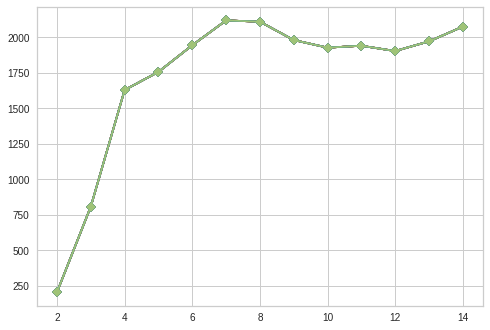

In [71]:
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.features import ParallelCoordinates

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
for n_clusters in range_n_clusters:
    #Initializing the clusterer with n_clusters value and a random   generator
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)
    #Using Elbow Plot
    visualizer= KElbowVisualizer(clusterer,k=(2,15),
    metric  ='calinski_harabaz',locate_elbow=False, timings= False)
    #Fitting the data to the visualizer
    visualizer.fit(X)  
    #Render the figure

For n_clusters = 2 The average   silhoutte_score is : 0.8312679581987129
For n_clusters = 3 The average   silhoutte_score is : 0.8982242633562936
For n_clusters = 4 The average   silhoutte_score is : 0.6662523394559298
For n_clusters = 5 The average   silhoutte_score is : 0.5929920432460359
For n_clusters = 6 The average   silhoutte_score is : 0.5784204840541826
For n_clusters = 7 The average   silhoutte_score is : 0.579707626995376
For n_clusters = 8 The average   silhoutte_score is : 0.55472028632483
For n_clusters = 9 The average   silhoutte_score is : 0.5379133993702324
For n_clusters = 10 The average   silhoutte_score is : 0.41236010990421723
For n_clusters = 11 The average   silhoutte_score is : 0.40029780066941706
For n_clusters = 12 The average   silhoutte_score is : 0.35889082044548154
For n_clusters = 13 The average   silhoutte_score is : 0.373988595965524
For n_clusters = 14 The average   silhoutte_score is : 0.3884179520419259
For n_clusters = 15 The average   silhoutte_sco

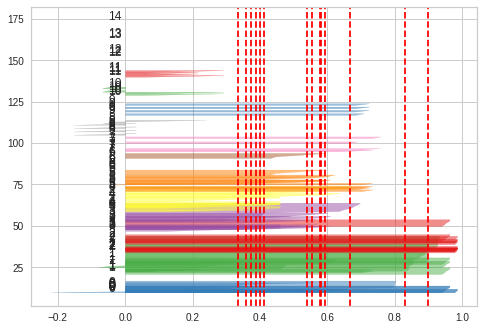

In [70]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
#Kmeans Clustering
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
for n_clusters in range_n_clusters:
    #Initializing the clusterer with n_clusters value and a random   generator
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)
    #The silhouette_score gives the average value for all the   samples.
    #Calculating number of clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,"The average   silhoutte_score is :", silhouette_avg)
    #Using Silhouette Plot
    visualizer = SilhouetteVisualizer(clusterer, colors = 'yellowbrick')
    #Fit the data to the visualizer
    visualizer.fit(X)       
    #Render the figure

In [32]:
import decimal 

def busca(array,beer):
    for i,el in enumerate(array):
        if el==beer:
            return i
    return None

def arrendondar (x):
    return int(decimal.Decimal(x).quantize(0, decimal.ROUND_HALF_UP))

def sum_array(array):
  if len(array)==0:
    return None
  soma = 0
  for i in array:
    soma += i
  return(soma/len(array))
################################################################################
def DataPreco(data, cerveja,conteiner,filtered_df,contador,quantidade_recomendada):
  mes = data[3:5]
  ano = data[6:]
  dia = data[:2]
  mes_atual = mes
  ano_atual = str(int(ano) - 1)
  dia_atual = dia
  dia30 = [4, 6, 9, 11]
  quantidade_container = 0

  filtered_df = filtered_df.loc[(filtered_df['Doc. Date'] >= f'{dia_atual}/{mes_atual}/{ano_atual}') & (filtered_df['Doc. Date'] < f'{dia_atual}/{mes_atual}/{ano}')]
  filtered_df.sort_values(by=['Doc. Date'], inplace = True, ascending = False)
    
  filtered_df = filtered_df.loc[filtered_df['Unidade Container']==conteiner]

  litros = filtered_df.iloc[0]['Container Size 2']
  #print(conteiner)
  #print(filtered_df.head())
  data_array = filtered_df['Preço/L'].to_numpy()
  media = sum_array(data_array)
  if media != None:
      #print("{1 CAIXA COM %d UNID E %.2f LITROS\npreco medio do L : %.2f"%(conteiner,litros,media))
      #print("1 CAIXA saira por %.2f $ (media * litragem da caixa)\
      #\ncolocar na parte de baixo de uma maneira mais organizada}"%(litros * media))
      if contador == 0:
          print("Recomendamos que voce compre %.2f litros dessa cervaja:"%(quantidade_recomendada))
      
      quantidade_container = arrendondar(quantidade_recomendada/litros)
      print("%d) %d container de %.2f L com %d unidades, com preco media do Litro de %.2f\nDando um total de %.2f $"
            %((contador+1),quantidade_container,litros,conteiner,media,litros * media))
  return

def funcao(data, cerveja,quantidade_recomendada):
    #fazer lista com os tipos de conteiner da cerveja 
    filtered_df = empdata.loc[empdata["Subrand"] == cerveja]
    #print(filtered_df)
    array_available_conteiners = filtered_df['Unidade Container'].unique()
    
    #print(array_available_conteiners[0])
    num_conteiner = filtered_df['Unidade Container'].nunique()
    c = 0
    conteiner = 0
    while c<num_conteiner:
        DataPreco(data, cerveja,array_available_conteiners[c], filtered_df,c,quantidade_recomendada)
        c+=1
    
    #print("\nRecomendamos que voce compre T litros dessa cervaja:\n1) Y container de X\nDando um total de W $")
    #if True:
     #   print("2) YY container de XX\nDando um total de WW $")
    # preco_medio = 0
    return
